In [15]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
ASD_CircuitsSet = pd.read_csv(
    "/home/jw3514/Work/ASD_Circuits/notebooks/ASD.SA.Circuits.Size46.csv",
    index_col="idx")
ASD_Circuits = ASD_CircuitsSet.loc[3, "STRs"].split(";")

In [17]:
adj_mat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv", index_col=0)
dist_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.ipsi.csv", index_col=0)
dist_mat.columns = dist_mat.index.values

In [18]:
g = LoadConnectome2(adj_mat) # Load Connectiome
for e in g.es:
    e["w2"] = 1/e["weight"]
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()

In [19]:
g2 = subgraph(g, ASD_Circuits)
dat = []
for v in g2.vs:
    dat.append([v.index, v["label"], str2reg[v["label"]]])
nodeDF = pd.DataFrame(dat, columns=["index", "STR", "REG"])
nodeDF = nodeDF.set_index("index")

In [20]:
spinglass_clustering = g2.community_spinglass()
for cluster in spinglass_clustering:
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(12, 2)
--  -----------------------------------  -----------------
 4  Agranular_insular_area_ventral_part  Isocortex
 6  Anterior_olfactory_nucleus           Olfactory_areas
 8  Basolateral_amygdalar_nucleus        Amygdalar
13  Claustrum                            Cortical_subplate
16  Dorsal_peduncular_area               Olfactory_areas
18  Endopiriform_nucleus_dorsal_part     Cortical_subplate
27  Orbital_area_lateral_part            Isocortex
28  Orbital_area_medial_part             Isocortex
31  Piriform_area                        Olfactory_areas
32  Prelimbic_area                       Isocortex
35  Nucleus_of_reuniens                  Thalamus
38  Submedial_nucleus_of_the_thalamus    Thalamus
--  -----------------------------------  -----------------
(10, 2)
--  -----------------------------------------  ---------
 0  Anterior_cingulate_area_dorsal_part        Isocortex
 1  Anterior_cingulate_area_ventral_part       Isocortex
 5  Anteromedial_nucleus_dorsal_part           Thal

In [21]:
opt_w2_clustering = g2.community_optimal_modularity(weights="w2")
for cluster in opt_w2_clustering:
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(10, 2)
--  -----------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part  Isocortex
13  Claustrum                            Cortical_subplate
19  Gustatory_areas                      Isocortex
24  Mediodorsal_nucleus_of_thalamus      Thalamus
26  Secondary_motor_area                 Isocortex
27  Orbital_area_lateral_part            Isocortex
29  Orbital_area_ventrolateral_part      Isocortex
30  Parafascicular_nucleus               Thalamus
38  Submedial_nucleus_of_the_thalamus    Thalamus
40  Primary_somatosensory_area_trunk     Isocortex
--  -----------------------------------  -----------------
(20, 2)
--  -------------------------------------------------  -----------------
 1  Anterior_cingulate_area_ventral_part               Isocortex
 3  Agranular_insular_area_posterior_part              Isocortex
 4  Agranular_insular_area_ventral_part                Isocortex
 6  Anterior_olfactory_nucleus                         Olfactory_areas
 8  Basolate

In [22]:
opt_w1_clustering = g2.community_optimal_modularity(weights="weight")
for cluster in xx:
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(9, 2)
--  -----------------------------------------  ---------
 0  Anterior_cingulate_area_dorsal_part        Isocortex
 1  Anterior_cingulate_area_ventral_part       Isocortex
 5  Anteromedial_nucleus_dorsal_part           Thalamus
22  Lateral_posterior_nucleus_of_the_thalamus  Thalamus
34  Posterior_parietal_association_areas       Isocortex
37  Retrosplenial_area_lateral_agranular_part  Isocortex
43  Anteromedial_visual_area                   Isocortex
44  Lateral_visual_area                        Isocortex
45  Primary_visual_area                        Isocortex
--  -----------------------------------------  ---------
(14, 2)
--  -------------------------------------------------  -----------
 2  Nucleus_accumbens                                  Striatum
 3  Agranular_insular_area_posterior_part              Isocortex
 9  Basomedial_amygdalar_nucleus                       Amygdalar
10  Bed_nuclei_of_the_stria_terminalis                 Pallidum
11  Field_CA1                      

In [23]:
opt_clustering_noweight = g2.community_optimal_modularity()
for cluster in opt_clustering_noweight:
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))


(9, 2)
--  -----------------------------------------  ---------
 0  Anterior_cingulate_area_dorsal_part        Isocortex
 1  Anterior_cingulate_area_ventral_part       Isocortex
 5  Anteromedial_nucleus_dorsal_part           Thalamus
22  Lateral_posterior_nucleus_of_the_thalamus  Thalamus
34  Posterior_parietal_association_areas       Isocortex
37  Retrosplenial_area_lateral_agranular_part  Isocortex
43  Anteromedial_visual_area                   Isocortex
44  Lateral_visual_area                        Isocortex
45  Primary_visual_area                        Isocortex
--  -----------------------------------------  ---------
(15, 2)
--  -------------------------------------------------  -----------
 2  Nucleus_accumbens                                  Striatum
 3  Agranular_insular_area_posterior_part              Isocortex
 9  Basomedial_amygdalar_nucleus                       Amygdalar
10  Bed_nuclei_of_the_stria_terminalis                 Pallidum
11  Field_CA1                      

In [24]:
g2.to_undirected()
opt_undirected_noweight_clustering = g2.community_optimal_modularity()
for cluster in opt_undirected_noweight_clustering:
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(9, 2)
--  -----------------------------------------  ---------
 0  Anterior_cingulate_area_dorsal_part        Isocortex
 1  Anterior_cingulate_area_ventral_part       Isocortex
 5  Anteromedial_nucleus_dorsal_part           Thalamus
22  Lateral_posterior_nucleus_of_the_thalamus  Thalamus
34  Posterior_parietal_association_areas       Isocortex
37  Retrosplenial_area_lateral_agranular_part  Isocortex
43  Anteromedial_visual_area                   Isocortex
44  Lateral_visual_area                        Isocortex
45  Primary_visual_area                        Isocortex
--  -----------------------------------------  ---------
(14, 2)
--  -------------------------------------------------  -----------
 2  Nucleus_accumbens                                  Striatum
 3  Agranular_insular_area_posterior_part              Isocortex
 9  Basomedial_amygdalar_nucleus                       Amygdalar
10  Bed_nuclei_of_the_stria_terminalis                 Pallidum
11  Field_CA1                      

In [25]:
Visual = nodeDF.loc[opt_clustering_noweight[0], :]["STR"].values
SubCortex = nodeDF.loc[opt_clustering_noweight[1], :]["STR"].values
Excutive = nodeDF.loc[opt_clustering_noweight[2], :]["STR"].values
MotorSensory = nodeDF.loc[opt_clustering_noweight[3], :]["STR"].values

In [34]:
CLUSTERS = [Visual,SubCortex,Excutive,MotorSensory]
dat = []
for C1 in CLUSTERS:
    dat_ = []
    for C2 in CLUSTERS:
        mat = adj_mat.loc[C1, C2]
        mat_Nedge = np.count_nonzero(mat.values)
        mat_All = mat.shape[0] * mat.shape[1]
        ratio = mat_Nedge / mat_All
        dat_.append(ratio)
    dat.append(dat_)
dat = np.array(dat)

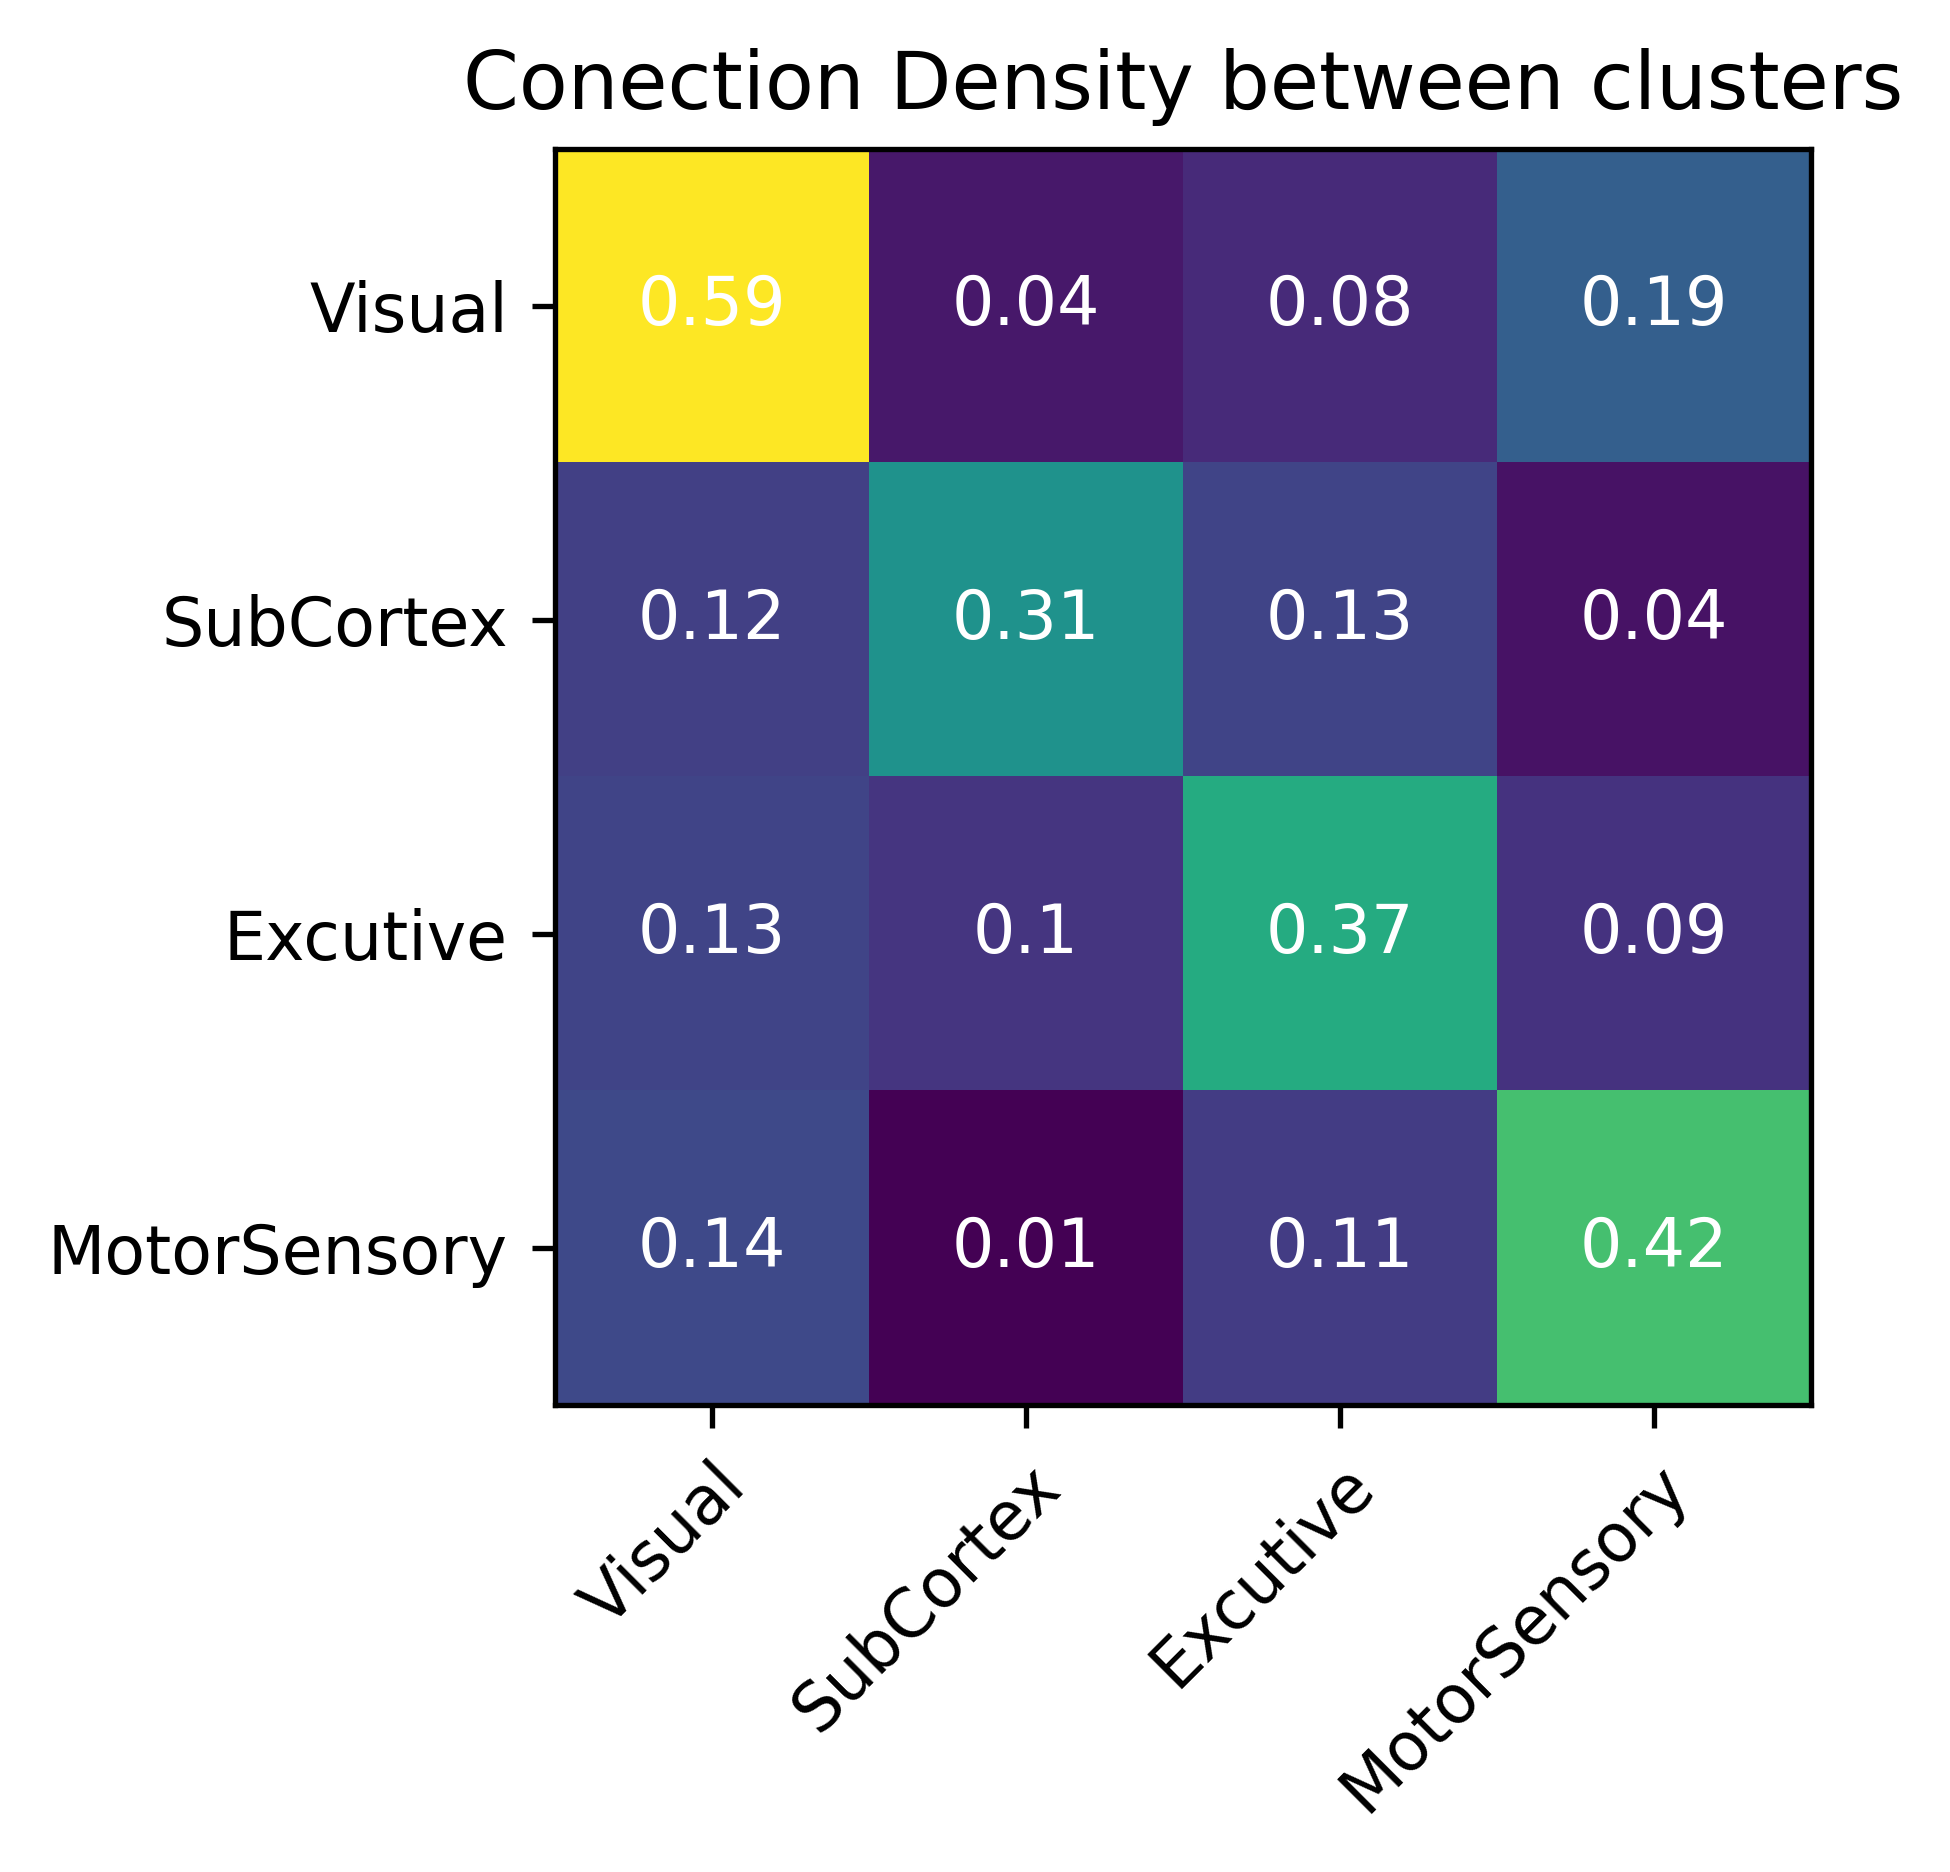

In [39]:
fig, ax = plt.subplots(dpi=480)
im = ax.imshow(dat)

# Show all ticks and label them with the respective list entries
Labels = ["Visual","SubCortex","Excutive","MotorSensory"]
ax.set_xticks(np.arange(len(Labels)), labels=Labels)
ax.set_yticks(np.arange(len(Labels)), labels=Labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Labels)):
    for j in range(len(Labels)):
        text = ax.text(j, i, round(dat[i, j],2),
                       ha="center", va="center", color="w")

ax.set_title("Conection Density between clusters")
fig.tight_layout()
plt.show()

##### old

In [27]:
Visual

array(['Anterior_cingulate_area_dorsal_part',
       'Anterior_cingulate_area_ventral_part',
       'Anteromedial_nucleus_dorsal_part',
       'Lateral_posterior_nucleus_of_the_thalamus',
       'Posterior_parietal_association_areas',
       'Retrosplenial_area_lateral_agranular_part',
       'Anteromedial_visual_area', 'Lateral_visual_area',
       'Primary_visual_area'], dtype=object)

In [51]:
Clust1 = Excutive
Clust2 = MotorSensory

mat1 = adj_mat.loc[Clust1, Clust2]
mat2 = adj_mat.loc[Clust2, Clust1]
mat1_Nedge = np.count_nonzero(mat1.values)
mat2_Nedge = np.count_nonzero(mat2.values)
mat1_All = mat1.shape[0] * mat1.shape[1]
mat2_All = mat2.shape[0] * mat2.shape[1]
ratio1 = mat1_Nedge / mat1_All
ratio2 = mat2_Nedge / mat2_All
print(ratio1, ratio2)

0.13125 0.2


In [52]:
Clust1 = Excutive
Clust2 = SubCortex

mat1 = adj_mat.loc[Clust1, Clust2]
mat2 = adj_mat.loc[Clust2, Clust1]
mat1_Nedge = np.count_nonzero(mat1.values)
mat2_Nedge = np.count_nonzero(mat2.values)
mat1_All = mat1.shape[0] * mat1.shape[1]
mat2_All = mat2.shape[0] * mat2.shape[1]
ratio1 = mat1_Nedge / mat1_All
ratio2 = mat2_Nedge / mat2_All
print(ratio1, ratio2)

0.13 0.19


In [53]:
Clust1 = SubCortex
Clust2 = MotorSensory

mat1 = adj_mat.loc[Clust1, Clust2]
mat2 = adj_mat.loc[Clust2, Clust1]
mat1_Nedge = np.count_nonzero(mat1.values)
mat2_Nedge = np.count_nonzero(mat2.values)
mat1_All = mat1.shape[0] * mat1.shape[1]
mat2_All = mat2.shape[0] * mat2.shape[1]
ratio1 = mat1_Nedge / mat1_All
ratio2 = mat2_Nedge / mat2_All
print(ratio1, ratio2)

0.075 0.03125


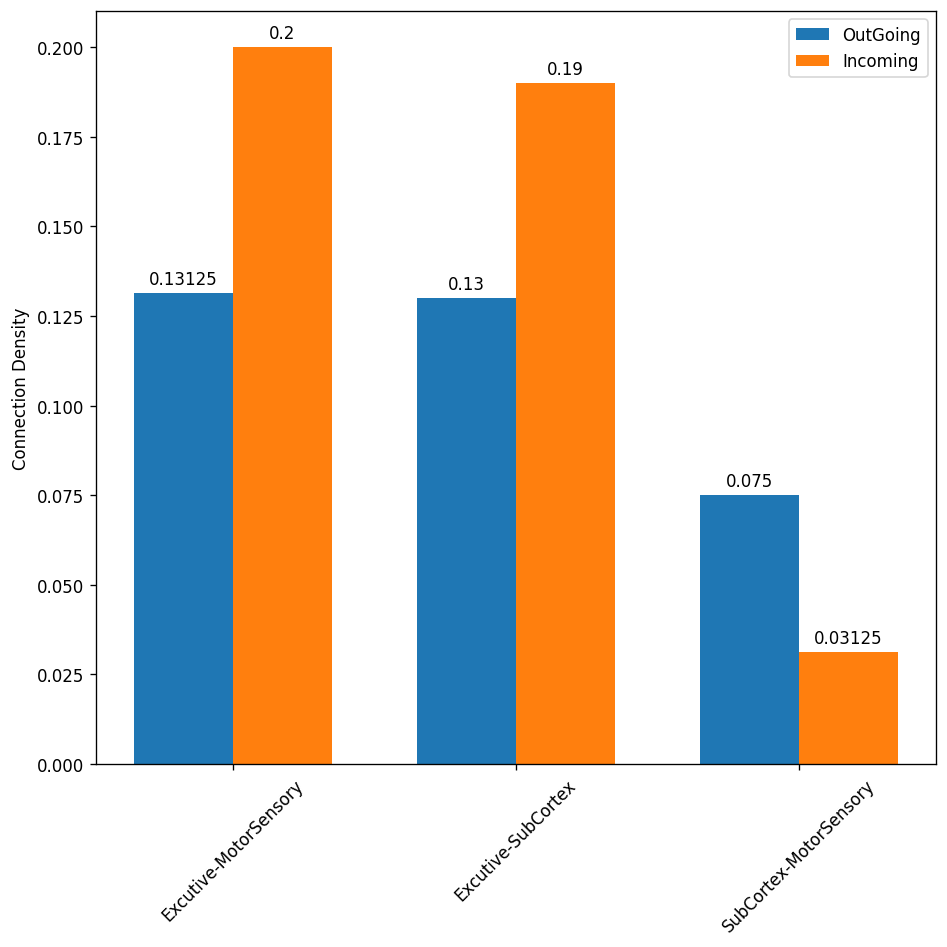

In [10]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Excutive-MotorSensory', 'Excutive-SubCortex', 'SubCortex-MotorSensory']
men_means = [0.13125, 0.13, 0.075]
women_means = [0.2, 0.19, 0.03125]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=120, figsize=(8,8))
rects1 = ax.bar(x - width/2, men_means, width, label='OutGoing')
rects2 = ax.bar(x + width/2, women_means, width, label='Incoming')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Connection Density')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
# Load 